In [ ]:
%pip install torch

In [ ]:
import qutip as qt
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Pauli operators
sx = qt.sigmax()
sz = qt.sigmaz()
sm = qt.sigmam()   # lowering operator

In [ ]:
Omega = 2 * np.pi * 1.0  # Rabi frequency
H = 0.5 * Omega * sx

In [ ]:
T1 = 10.0
gamma1 = 1 / T1

c_ops = [np.sqrt(gamma1) * sm]

In [ ]:
psi0 = qt.basis(2, 0)  # |g>
tlist = np.linspace(0, 10, 400)

10.0%. Run time:   3.09s. Est. time left: 00:00:00:27
20.0%. Run time:   6.53s. Est. time left: 00:00:00:26
30.0%. Run time:   9.50s. Est. time left: 00:00:00:22
40.0%. Run time:  12.48s. Est. time left: 00:00:00:18
50.0%. Run time:  15.50s. Est. time left: 00:00:00:15
60.0%. Run time:  18.46s. Est. time left: 00:00:00:12
70.0%. Run time:  21.44s. Est. time left: 00:00:00:09
80.0%. Run time:  24.43s. Est. time left: 00:00:00:06
90.0%. Run time:  27.41s. Est. time left: 00:00:00:03
100.0%. Run time:  30.78s. Est. time left: 00:00:00:00
Total run time:  30.78s


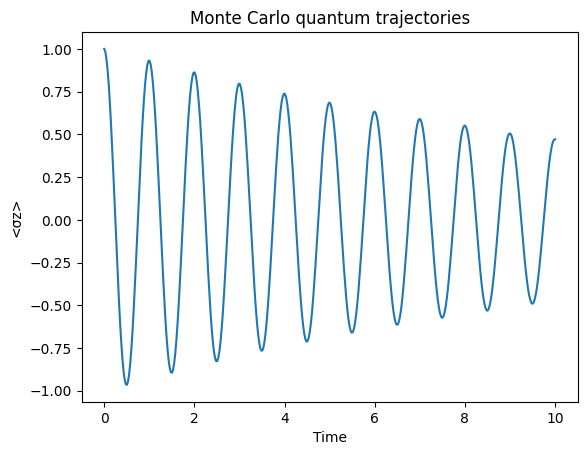

In [22]:
ntraj = 10000 # number of trajectories

result = qt.mcsolve(
    H,
    psi0,
    tlist,
    c_ops=c_ops,
    e_ops=[sz],
    ntraj=ntraj,
)

plt.plot(tlist, result.expect[0])
plt.xlabel("Time")
plt.ylabel("<σz>")
plt.title("Monte Carlo quantum trajectories")
plt.show()

In [23]:
import torch

device = torch.device("mps")
dtype = torch.complex64

In [46]:
# Device (Mac GPU)
device = torch.device("mps")   # use "cuda" on NVIDIA

# Parameters
N = 5000  # Monte Carlo shots
T = 3000         # time points
Omega = 2.0
sigma = 0.05

# Time axis
t = torch.linspace(0, 100, T, device=device)

# Monte Carlo noise (GPU)
delta = sigma * torch.randn(N, device=device)

# Batched evolution (GPU)
Z = torch.cos((Omega + delta[:, None]) * t)

# Statistics (GPU)
mean = Z.mean(dim=0)
std  = Z.std(dim=0)

In [47]:
t_cpu    = t.cpu().numpy()
mean_cpu = mean.cpu().numpy()
std_cpu  = std.cpu().numpy()

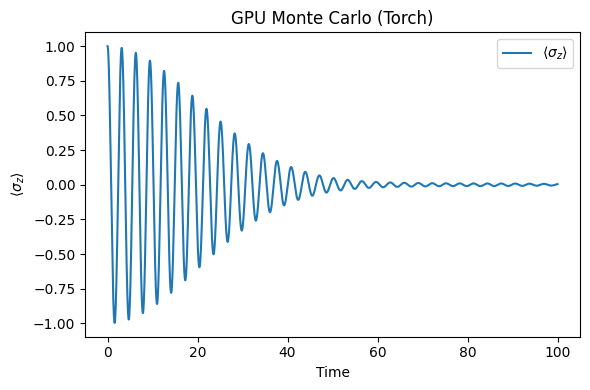

In [48]:
plt.figure(figsize=(6, 4))

plt.plot(t_cpu, mean_cpu, label=r"$\langle \sigma_z \rangle$")
# plt.fill_between(
#     t_cpu,
#     mean_cpu - std_cpu,
#     mean_cpu + std_cpu,
#     alpha=0.3,
#     label="MC std",
# )

plt.xlabel("Time")
plt.ylabel(r"$\langle \sigma_z \rangle$")
plt.title("GPU Monte Carlo (Torch)")
plt.legend()
plt.tight_layout()
plt.show()